**HW2-MLH, 4\1\21** 

Shachar Zigron 316356401
Shay Ohana 315800375




# **Theory Questions:**
### Question 1
The  evaluation metric that more important to us is model performance beacuse accuracy is the proportion of the total number of predictions that were correct.Therefore the accuracy depends on the distribution of the labels in the data that the model received as can be seen in the following example:
a model that is constantly classify the data as not sick.If we put the following data in the model: 90 patients labeled as not sick and 10 patients labeled as sick, we get 90% accuracy, but in practice the model did not identify any sick patient and therefore its performance is poor, and can not be used to detect disease.

### Question 2 

Choosing a model that uses the five features: This model takes into account more aspects of the patient's life that can affect heart health and therefore cause a heart attack, such as the age feature of the patient. Ignoring from this features will not provide the overall picture of the patient and may cause to erros in classification and the model performance will be worse.
In general a model with a larger number of features can cause overfitting and inaccuracy in classification when some features do not contribute additional information, i.e. features that are redundant. for example ,level of physical activity correlated with blood pressure and therefore does not add information When the patient's blood pressure is already known.

Choosing a model that uses 2 features: This model reduces the running time of the model,reduces the training time (significantly reflected when comparing to a model with a very large number of features), in addition this model reduces overfitting- Less redundant data means less opportunity to make decisions based on noise. And accuracy improves beacuse there are less irrelevant data that may affect the prediction.

In general a greater number of features requires a larger financial investment in data collection (performing and collecting data of more tests) but since here the difference between the features is not large between the models and no further testing is needed, the financial cost is not a factor in choosing the model.

## Question 3:
Given that the samples are similar to each other and difficult to separate, we will conclude that the relevant features for classification such as color, size, number of cells, cell density have similar values in all samples and therefore linear classification will give poor performance, because it is not possible to choose a linear line for sperate the classes. Therefore we chose to use a non-linear SVM model that can adjust a separation limit that will give satisfactory performance because in this model the kernel trick can be used and moving the data to another space where several features can be combined and thereby cause differences between classes that make them separable.

## Question 4:
The differences between LR and linear SVM are:
1. The SVM model finds the best margin (distance between the line and the support vectors) that separates the classes and therfore the chance to do a mistake is lower, while LR model finds several decision boundary options that are close to the optimal boundary and therfore the chance to do a mistake is higher.
2. The SVM model relies on the geometric structure of the data and returns the prediction, for example 0 or 1, sick or not sick. Whereas the LR model relies on a statistical approach and returns the probabilities of belonging to a particular class and by them it decides the classification.
3. The LR model is sensitive to overfitting because it takes into account all the data in order to train a model, while SVM relies only on the nearest points in order to find a decision boundary. For the same reason LR is sensitive to outliers values, and SVM is not.
4. For linear SVM model there is one hyper parameter: C- is the penalty parameter that tell how much error is bearable and using high C might lead to overfitting.
   For LR model there is one hyper parameter: $\lambda$- Regularization parameter, control the magnitude of the 𝑤(weights) by control how much emphasis is given to the penalty (l1 or l2).Using high $\lambda$ might lead to underfitting and vice versa to overfitting.
   The relationship between C and $\lambda$ is inverse. I.e. strong punishment in the SVM model, (large C) while strong punishment in LR is expressed in small $\lambda$. 


# **Coding Assignment**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import hinge_loss
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from Functions import kfold5_logistic

### Section 1:

In [2]:
#import data
file = Path.cwd().joinpath('HW2_data.csv') 
D1T_dataset = pd.read_csv(file) # load the data

Because we know there are a number of participants who did not answer some of the questions, we will discard the participants who did not answer more than two questions, as random filling in these lines will result to error and will change the model results.
After removing these participants we will randomly fill the remaining NAN values ​​in each column by values ​​from that column and according to their probability.

In [3]:
# preprocessing on the data
#drop all the rows in the data that include more than Two NaN
D1T_dataset=D1T_dataset.T
for id in D1T_dataset:
        flag=D1T_dataset[id].isna().sum()
        if flag>2:
            del D1T_dataset[id]
D1T_dataset=D1T_dataset.T

D1T_dataset['Age']=pd.to_numeric(D1T_dataset['Age'])
D1T_dataset['Family History']=pd.to_numeric(D1T_dataset['Family History'])

#split dataset into features and diagnosis
D1T_features = D1T_dataset[['Age','Gender','Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness',
                           'Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing',
                           'Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Family History']]
D1T_Diagnosis = D1T_dataset[['Diagnosis']]

# Change all the features with answers of YES/NO to binary
D1T_features=pd.get_dummies(data=D1T_features, drop_first=True)
D1T_Diagnosis=pd.get_dummies(data=D1T_Diagnosis,drop_first=True)
D1T_features_copy=D1T_features.copy()

for id in D1T_features_copy:
    D1T_features.loc[D1T_features_copy[id].isnull(),D1T_features.columns.str.startswith(id)] = np.nan #return all the Nan value

# for Nan value we will insert a random number from the column
for col in D1T_features:
    D1T_features_noNan=D1T_features[col].dropna()
    for id in D1T_features[col].index :
        if np.isnan(D1T_features[col][id])==True:
            D1T_features[col][id]=np.random.choice(D1T_features_noNan,p=histogram(D1T_features_noNan, density=True))


### Section 2:

In [4]:
# test-train split of 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(D1T_features, np.ravel(D1T_Diagnosis), test_size=0.2,random_state=0, stratify=np.ravel(D1T_Diagnosis))
    

### Section 3 :

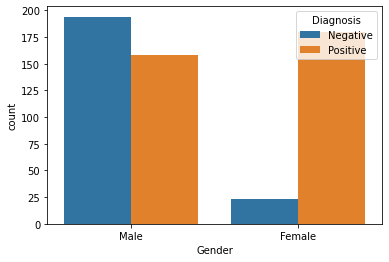

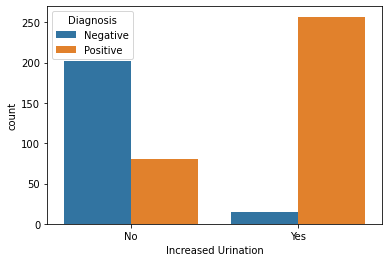

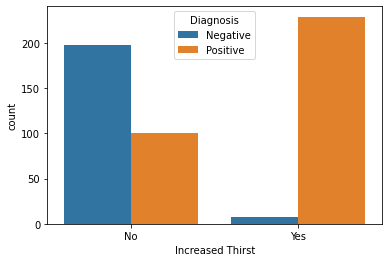

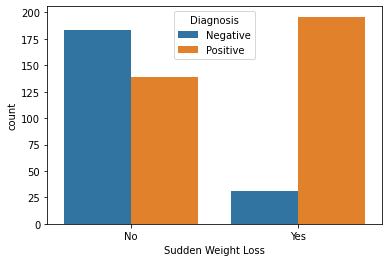

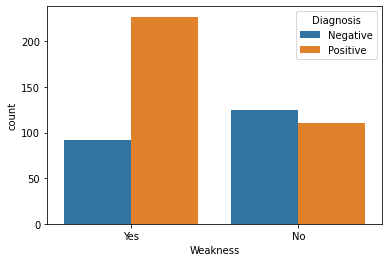

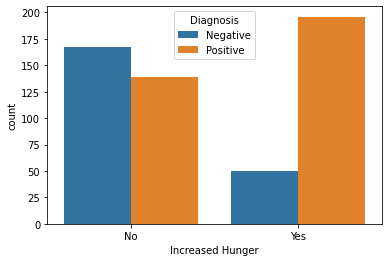

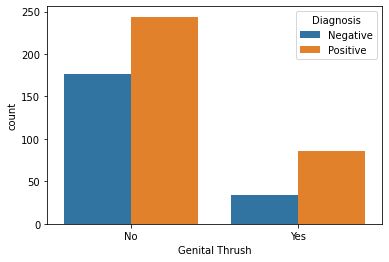

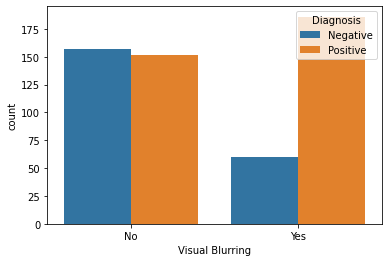

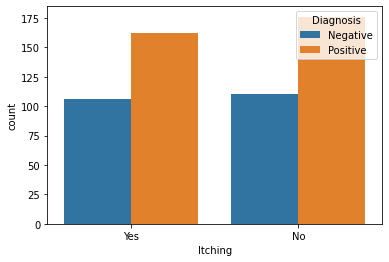

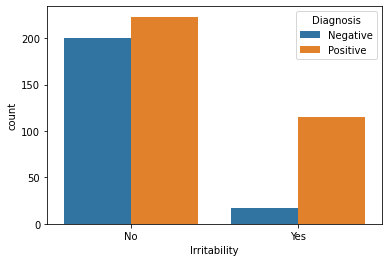

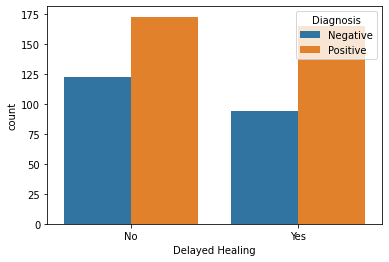

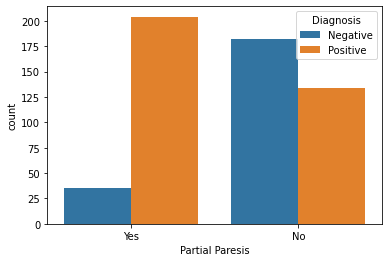

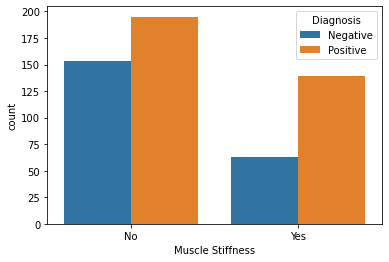

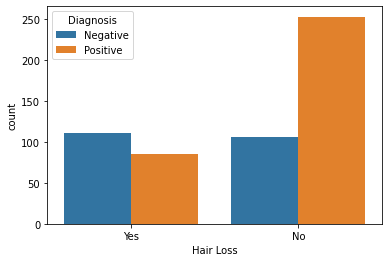

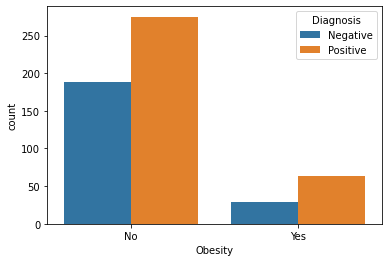

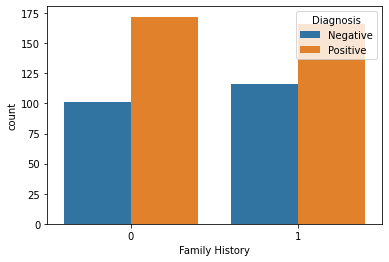

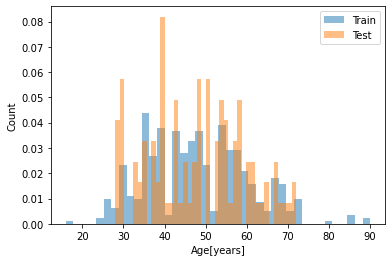

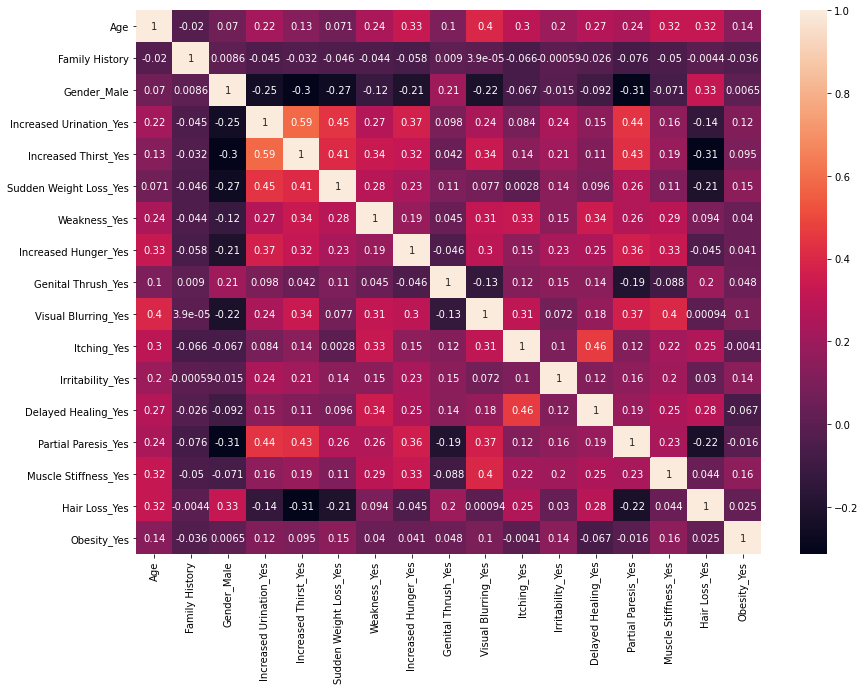

,Positive Feature,Train%,Test%,delta%
1,Gender,50.6757,51.3514,-0.675676
2,Increased Urination,64.1892,60.3604,3.82883
3,Increased Thirst,49.3243,47.7477,1.57658
4,Sudden Weight Loss,43.2432,40.5405,2.7027
5,Weakness,40.5405,42.3423,-1.8018
6,Increased Hunger,56.982,59.4595,-2.47748
7,Genital Thrush,45.2703,40.5405,4.72973
8,Visual Blurring,21.8468,20.7207,1.12613
9,Itching,44.3694,44.1441,0.225225
10,Irritability,48.8739,45.9459,2.92793


In [5]:
#visualiziton of data
distribution_test_train={}
distribution_test_train['Positive Feature']=['Age','Gender','Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness',
                           'Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing',
                           'Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Family History']
sum_Xtrain={}
sum_Xtest={}
delta={}
for col in D1T_features:
    sum_Xtrain[col]=sum(X_train[col])/len(X_train[col])*100
    sum_Xtest[col] = sum(X_test[col]) / len(X_test[col]) * 100
    delta[col]=sum_Xtrain[col]-sum_Xtest[col]


distribution_test_train['Train%']=sum_Xtrain.values()
distribution_test_train['Test%']=sum_Xtest.values()
distribution_test_train['delta%']=delta.values()
distribution_test_train=pd.DataFrame(distribution_test_train)
distribution_test_train=distribution_test_train.T
del distribution_test_train[0]
distribution_test_train=distribution_test_train.T

# Plots showing the frequency of evert feature according to Diagnosis

for id in D1T_dataset.iloc[:,1:16]:
    g=sns.countplot(x=id, hue="Diagnosis", data=D1T_dataset)
    plt.show()

g=sns.countplot(x='Family History', hue="Diagnosis", data=D1T_dataset)
plt.show()

#Histogram of feature 'Age'
plt.hist(X_train['Age'], bins=40, density=True,alpha=0.5, label='Train')
plt.hist(X_test['Age'], bins=40, density=True,alpha=0.5, label='Test')
plt.xlabel('Age[years]')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

#if we assume linear model, we can use the correlation matrix to visualize the correlation between all the features
plt.figure(figsize = (14,10))
sns.heatmap(D1T_features.corr(), annot = True)
plt.show()

distribution_test_train

#### Answer section 3a:
According to the table and the graphs we can see that the differences between the test and train group are relatively low, so we conclude that the distribution in test and train is close and the split was good.
An imbalance of features between train and test cause the learning model to overfitting on training data beacuse its learn on one value of the features and when we imply the model on the test group the classification will be worng ,not accurate and the model will have a high bias.
In order to solve the issue we would try to change the random state in split function until we get smaller delta% or do the split when stratify according to another feature, and not by Diagnosis. 

#### Answer section 3d:
We would expect the family history feature to be more important for diagnosis as positive or negative, but in practice according to the graph we received it can be seen that the number of people who have a family history of D1T and were diagnosed as positive for the disease is not significantly higher than the number of people with a family history of D1T and were diagnosed as negative. In addition it can be seen that most women are positive for the disease, compared to men whose positive number is similar to the number of negative.

we think that the features Increased Urination,Increased Thirst and Partial Paresis are will be particularly important to our model,Because for these features most people who answered YES( i.e. suffer from this symptom) were diagnosed as positive for the disease while most people who answered NO( i.e. did not suffer from this symptom) were diagnosed as negative for the disease. For these features it appears to be an association between the onset of the symptom and the diagnosis of the disease, so we expect  that the model will learn high weights for them.


### **Section 4**:
Section 4 was performed in section 1 during the preprocessing on the data.

### **section 5** 
We will compare two models :  Linear model -Logistic Regression ,Non linear model-SVM (poly,rbf)

First of all, We will perform 5k cross fold validation in order to select the hyper-parameters($ \lambda $,penalty) that gives the best model performance (lowest cost function)

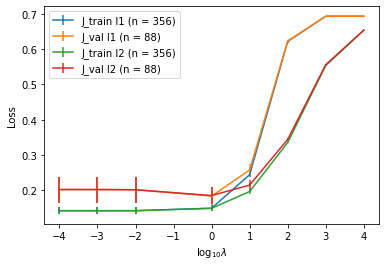

In [7]:
#1.model lineary , logistic regression
lmbda = np.array([0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000])
n_splits = 5
scaler=StandardScaler()
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)

J_train = np.zeros((2,len(lmbda)))
J_val = np.zeros((2,len(lmbda)))
pen='l1'
solver = 'liblinear'

for idx, lmb in enumerate(lmbda):
    C = 1/lmb
    log_reg=LogisticRegression(random_state=5, penalty=pen, C=C, max_iter=1000,solver=solver)
    h = 0
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits)
    for train_index, val_index in skf.split(X_train, y_train):
        x_train_fold, x_val_fold = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
        x_train_fold= scaler.fit_transform(x_train_fold)
        x_val_fold= scaler.transform(x_val_fold)
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        log_reg.fit(x_train_fold, y_train_fold)
        y_pred_train=log_reg.predict_proba(x_train_fold)
        J_train_fold[h]=log_loss(y_train_fold,y_pred_train)
        y_pred_val=log_reg.predict_proba(x_val_fold)
        J_val_fold[h]=log_loss(y_val_fold,y_pred_val)

        h += 1
    J_train[0,idx]=J_train_fold.mean()
    J_train[1,idx]=J_train_fold.std()
    J_val[0,idx]=J_val_fold.mean()
    J_val[1,idx]=J_val_fold.std()

J_train2 = np.zeros((2,len(lmbda)))
J_val2 = np.zeros((2,len(lmbda)))
pen='l2'
solver = 'lbfgs'

for idx, lmb in enumerate(lmbda):
    C = 1/lmb
    log_reg=LogisticRegression(random_state=5, penalty=pen, C=C, max_iter=1000,solver=solver)
    h = 0
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits)
    for train_index, val_index in skf.split(X_train, y_train):
        x_train_fold, x_val_fold = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
        x_train_fold= scaler.fit_transform(x_train_fold)
        x_val_fold= scaler.transform(x_val_fold)
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        log_reg.fit(x_train_fold, y_train_fold)
        y_pred_train=log_reg.predict_proba(x_train_fold)
        J_train_fold[h]=log_loss(y_train_fold,y_pred_train)
        y_pred_val=log_reg.predict_proba(x_val_fold)
        J_val_fold[h]=log_loss(y_val_fold,y_pred_val)

        h += 1
    J_train2[0,idx]=J_train_fold.mean()
    J_train2[1,idx]=J_train_fold.std()
    J_val2[0,idx]=J_val_fold.mean()
    J_val2[1,idx]=J_val_fold.std()


plt.errorbar(np.log10(lmbda), J_train[0,:], yerr=J_train[1,:])
plt.errorbar(np.log10(lmbda), J_val[0,:], yerr=J_val[1,:])
plt.errorbar(np.log10(lmbda), J_train2[0,:], yerr=J_train2[1,:])
plt.errorbar(np.log10(lmbda), J_val2[0,:], yerr=J_val2[1,:])
plt.xlabel('$\log_{10}\lambda$')
plt.ylabel('Loss')
plt.legend(['J_train l1 (n = ' + str(x_train_fold.shape[0]) + ')', 'J_val l1 (n = ' + str(x_val_fold.shape[0]) + ')',
            'J_train l2 (n = ' + str(x_train_fold.shape[0]) + ')', 'J_val l2 (n = ' + str(x_val_fold.shape[0]) + ')'])
plt.show()



we choose $\lambda=1, penalty=l1$.

now we apply the model on the train data and test data with the choosen $\lambda$  and test our model preformance.

Preformance of train set:


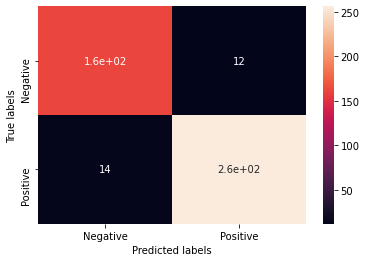

Accuracy of logistic regression model : 94.14%
F1 score of logistic regression model : 93.87%
Loss of logistic regression model : 0.27
AUROC of logistic regression model : 0.99

 Preformance of test set:


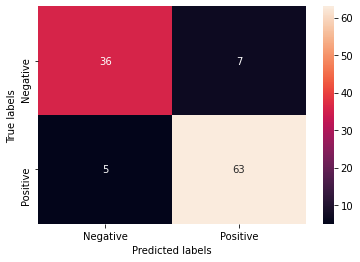

Accuracy of logistic regression model : 89.19%
F1 score of logistic regression model: 88.51%
Loss of logistic regression model : 0.27
AUROC of logistic regression model: 0.96


In [8]:
#we choose l1, lambda=1
log_reg = LogisticRegression(random_state=5, penalty='l1', C = 1, max_iter=1000,solver='liblinear')
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)
log_reg.fit(X_train_scale, y_train)
y_pred_train=log_reg.predict(X_train_scale)
y_pred_proba_train = log_reg.predict_proba(X_train_scale)
J_train=log_loss(y_train,y_pred_proba_train )

y_pred_test = log_reg.predict(X_test_scale)
y_pred_proba_test = log_reg.predict_proba(X_test_scale)
J_test=log_loss(y_test,y_pred_proba_test )

#performance on train set
print('Preformance of train set:')
matrix_conf=metrics.confusion_matrix(y_train,y_pred_train)
sns.heatmap(matrix_conf, annot=True, xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive']).set(ylabel='True labels', xlabel='Predicted labels')
plt.grid(False)
plt.show()

print("Accuracy of logistic regression model : " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train))) + "%")
print("F1 score of logistic regression model : " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train, average='macro'))) + "%")
print("Loss of logistic regression model : " +str("{0:.2f}".format(J_test)))
print('AUROC of logistic regression model : {:.2f}'.format(roc_auc_score(y_train, y_pred_proba_train[:,1])))
#preformance on test set

print('\n Preformance of test set:')
matrix_conf=metrics.confusion_matrix(y_test,y_pred_test)
sns.heatmap(matrix_conf, annot=True, xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive']).set(ylabel='True labels', xlabel='Predicted labels')
plt.grid(False)
plt.show()

print("Accuracy of logistic regression model : " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test))) + "%")
print("F1 score of logistic regression model: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test, average='macro'))) + "%")
print("Loss of logistic regression model : " +str("{0:.2f}".format(J_test)))
print('AUROC of logistic regression model: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.989, test=0.989), f1=(train=0.991, test=0.991), precision=(train=0.986, test=1.000), recall=(train=0.995, test=0.981), roc_auc=(train=0.999, test=0.999), total=   0.1s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.986, test=1.000), f1=(train=0.989, test=1.000), precision=(train=0.982, test=1.000), recall=(train=0.995, test=1.000), roc_auc=(train=0.999, test=1.000), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.994, test=0.944), f1=(train=0.995, test=0.954), precision=(train=0.995, test=0.945), recall=(train=0.995, test=0.963), roc_auc=(train=1.000, test=0.988), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.992, test=0.944), f1=(train=0.993, test=0.953), precision=(train=0.986, test=0.962), recall=(train=1.000, test=0.944), roc_auc=(train=0.999, test=0.985), total=   0.1s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.986, test=0.977), f1=(train=0.989, test=0.981), precision=(train=0.982, test=0.981), recall=(train=0.995, test=0.981), roc_auc=(train=1.000, test=0.999), total=   0.1s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=poly ......
[CV]  svm__C=1, svm__degree=3, svm

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.3s finished


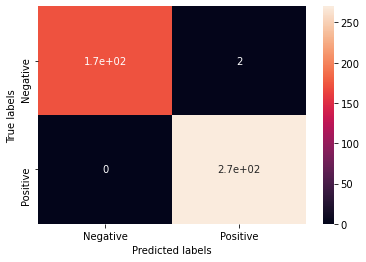

Preformance of train set:
Accuracy of SVM  model is: 99.55%
F1 score of SVM  model is: 99.53%
Loss of SVM  model is: 0.40
AUROC of SVM  model is: 1.00


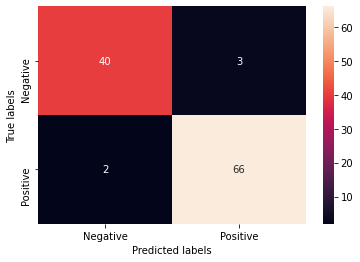

Preformance of test set:
Accuracy of SVM model is: 95.50%
F1 score of SVM model is: 95.23%
Loss of SVM  model is: 0.43
AUROC of SVM  model is: 0.99


In [9]:
#nonlinear model

svc = SVC(probability=True)
C = np.array([1, 100, 1000])
pipe=Pipeline(steps=[('scaler', StandardScaler()),('svm',svc)])
svm_nonlin=GridSearchCV(estimator=pipe,param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C,'svm__degree':[3],'svm__gamma':['auto','scale']},scoring=['accuracy','f1','precision','recall','roc_auc'],cv=skf,refit='roc_auc', verbose=3,return_train_score=True)
svm_nonlin.fit(X_train,y_train)
best_svm_nonlin=svm_nonlin.best_estimator_
print('\n The best parmters are:')
print(svm_nonlin.best_params_)

y_pred_train_nonlinear= best_svm_nonlin.predict(X_train)
y_pred_proba_train_nonlinear = best_svm_nonlin.predict_proba(X_train)
J_train_nonlinear=hinge_loss(y_train,y_pred_train_nonlinear )

y_pred_test_nonlinear= best_svm_nonlin.predict(X_test)
y_pred_proba_test_nonlinear = best_svm_nonlin.predict_proba(X_test)
J_test_nonlinear=hinge_loss(y_test,y_pred_test_nonlinear )

#performance on train set
matrix_conf=metrics.confusion_matrix(y_train,y_pred_train_nonlinear)
sns.heatmap(matrix_conf, annot=True, xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive']).set(ylabel='True labels', xlabel='Predicted labels')
plt.grid(False)
plt.show()

print('Preformance of train set:')
print("Accuracy of SVM  model is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_nonlinear))) + "%")
print("F1 score of SVM  model is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_nonlinear, average='macro'))) + "%")
print("Loss of SVM  model is: " +str("{0:.2f}".format(J_train_nonlinear)))
print('AUROC of SVM  model is: {:.2f}'.format(roc_auc_score(y_train, y_pred_proba_train_nonlinear[:,1])))

#performance on test set
matrix_conf=metrics.confusion_matrix(y_test,y_pred_test_nonlinear)
sns.heatmap(matrix_conf, annot=True, xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive']).set(ylabel='True labels', xlabel='Predicted labels')
plt.grid(False)
plt.show()

print('Preformance of test set:')
print("Accuracy of SVM model is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_nonlinear))) + "%")
print("F1 score of SVM model is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_nonlinear, average='macro'))) + "%")
print("Loss of SVM  model is: " +str("{0:.2f}".format(J_test_nonlinear)))
print('AUROC of SVM  model is: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test_nonlinear[:,1])))

Further to the answer on question 1 in the theoretical questions we will not refer to accuracy, as this is an preformance parameter that can be misleading. But it can be seen that in the nonlinear model the accuracy obtained for the test set is higher from the test set in the linear model.
For these data a non-linear model gives the best performance.we See that there is an improvement in F1, and AUROC i.e. the model better separates between positive label and negative label (not sick in D1T). In addition, it can be concluded from the confusion matrix of the test result that the sensitivity of the nonlinear model is better,classiify almost all the sick patients as sick.
The loss function was calculated in two different ways for the two models and therefore it is not possible to compare the results in the two models. But it can be seen that the loss function in non linear SVM is the lowest.
In conclusion for the nonlinear model we got better results showing the improvement of the classification by the nonlinear model and therefore we chose it.

### **section 6**:
Apply a Random Forest to explore feature importance


In [10]:
# random forest to choose the two important features:
rfc=RandomForestClassifier(n_estimators = 100)
sel = SelectFromModel(rfc,max_features=2)
sel.fit(X_train, y_train)
important_features=sel.get_support()
important_features=X_train.columns[(important_features)]
print('The important features are: '+important_features[1]+', '+important_features[0])

The important features are: Increased Thirst_Yes, Increased Urination_Yes


According to the random forest the 2 most important features are: Increased Thirst and Increased Urination as we expected in the feature exploration we did in section 3.

### **section 7**
In the following sections we will present the use of the PCA algorithm to perform dimension reduction. According to the teaching assistants it is not possible to apply PCA on the data that given to us because it is binary, but the algorithm we have built can be used for other non-binary data.

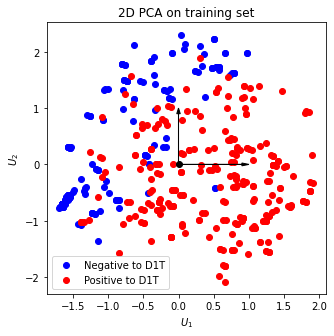

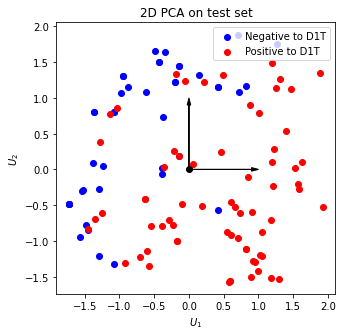

In [12]:
# Dimensionality reduction
X_train_scale=X_train.values
X_test_scale=X_test.values
scaler = StandardScaler()
X_train_scale=scaler.fit_transform(X_train_scale)
X_test_scale=scaler.transform(X_test_scale)
pca = PCA(n_components=2, whiten=True)
X_train_pca = pca.fit_transform(X_train_scale)
X_test_pca = pca.fit_transform(X_test_scale)


fig = plt.figure(figsize=(5, 5))
ax =plt.subplot(111)
ax.scatter(X_train_pca[y_train==0, 0], X_train_pca[y_train==0, 1], color='b')
ax.scatter(X_train_pca[y_train==1, 0], X_train_pca[y_train==1, 1], color='r')
ax.legend(('Negative to D1T','Positive to D1T'))
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel('$U_1$')
ax.set_ylabel('$U_2$')
ax.set_title('2D PCA on training set')
plt.show()

fig = plt.figure(figsize=(5, 5))
ax =plt.subplot(111)
ax.scatter(X_test_pca[y_test==0, 0], X_test_pca[y_test==0, 1], color='b')
ax.scatter(X_test_pca[y_test==1, 0], X_test_pca[y_test==1, 1], color='r')
ax.legend(('Negative to D1T','Positive to D1T'))
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel('$U_1$')
ax.set_ylabel('$U_2$')
ax.set_title('2D PCA on test set')
plt.show()




###### **Answer 7.b:**
In general the data after dimensional reduction can be separated linearly but not perfectly. Because we can see parts in the figure with overlap between the positive and the negative classes. That is, if we run a linear model we will get good results but not the best.
A non-linear model maybe will give better results and this will be tested in the following sections

###### **7.c**
Train the same models above on the dimensionality-reduced training set.

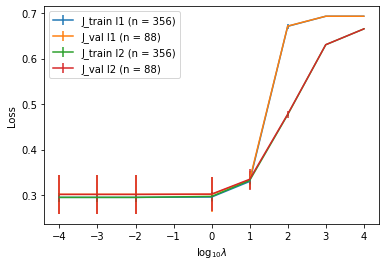

In [13]:
#lineary model -logistic regression with dimensionality-reduced
lmbda = np.array([0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000])
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)

J_train = np.zeros((2,len(lmbda)))
J_val = np.zeros((2,len(lmbda)))
pen='l1'
solver = 'liblinear'

for idx, lmb in enumerate(lmbda):
    C = 1/lmb
    log_reg=LogisticRegression(random_state=5, penalty=pen, C=C, max_iter=1000,solver=solver)
    h = 0
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits)
    for train_index, val_index in skf.split(X_train_pca, y_train):
        x_train_fold, x_val_fold = X_train_pca[train_index, :], X_train_pca[val_index, :]
        x_train_fold= scaler.fit_transform(x_train_fold)
        x_val_fold= scaler.transform(x_val_fold)
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        log_reg.fit(x_train_fold, y_train_fold)
        y_pred_train=log_reg.predict_proba(x_train_fold)
        J_train_fold[h]=log_loss(y_train_fold,y_pred_train)
        y_pred_val=log_reg.predict_proba(x_val_fold)
        J_val_fold[h]=log_loss(y_val_fold,y_pred_val)

        h += 1
    J_train[0,idx]=J_train_fold.mean()
    J_train[1,idx]=J_train_fold.std()
    J_val[0,idx]=J_val_fold.mean()
    J_val[1,idx]=J_val_fold.std()

J_train2 = np.zeros((2,len(lmbda)))
J_val2 = np.zeros((2,len(lmbda)))
pen='l2'
solver = 'lbfgs'

for idx, lmb in enumerate(lmbda):
    C = 1/lmb
    log_reg=LogisticRegression(random_state=5, penalty=pen, C=C, max_iter=1000,solver=solver)
    h = 0
    J_train_fold = np.zeros(n_splits)
    J_val_fold = np.zeros(n_splits)
    for train_index, val_index in skf.split(X_train_pca, y_train):
        x_train_fold, x_val_fold = X_train_pca[train_index, :], X_train_pca[val_index, :]
        x_train_fold= scaler.fit_transform(x_train_fold)
        x_val_fold= scaler.transform(x_val_fold)
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        log_reg.fit(x_train_fold, y_train_fold)
        y_pred_train=log_reg.predict_proba(x_train_fold)
        J_train_fold[h]=log_loss(y_train_fold,y_pred_train)
        y_pred_val=log_reg.predict_proba(x_val_fold)
        J_val_fold[h]=log_loss(y_val_fold,y_pred_val)

        h += 1
    J_train2[0,idx]=J_train_fold.mean()
    J_train2[1,idx]=J_train_fold.std()
    J_val2[0,idx]=J_val_fold.mean()
    J_val2[1,idx]=J_val_fold.std()


plt.errorbar(np.log10(lmbda), J_train[0,:], yerr=J_train[1,:])
plt.errorbar(np.log10(lmbda), J_val[0,:], yerr=J_val[1,:])
plt.errorbar(np.log10(lmbda), J_train2[0,:], yerr=J_train2[1,:])
plt.errorbar(np.log10(lmbda), J_val2[0,:], yerr=J_val2[1,:])
plt.xlabel('$\log_{10}\lambda$')
plt.ylabel('Loss')
plt.legend(['J_train l1 (n = ' + str(x_train_fold.shape[0]) + ')', 'J_val l1 (n = ' + str(x_val_fold.shape[0]) + ')',
            'J_train l2 (n = ' + str(x_train_fold.shape[0]) + ')', 'J_val l2 (n = ' + str(x_val_fold.shape[0]) + ')'])
plt.show()



Preformance of train set:


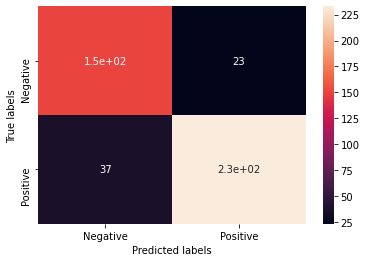

Accuracy of logistic regression model : 86.49%
F1 score of logistic regression model : 86.01%
Loss of logistic regression model : 0.39
AUROC of logistic regression model : 0.94

 Preformance of test set:


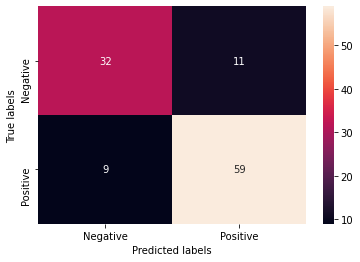

Accuracy of logistic regression model : 81.98%
F1 score of logistic regression model: 80.85%
Loss of logistic regression model : 0.39
AUROC of logistic regression model: 0.91


In [14]:
# Aplly logistic regression on the Dimensionality reduction with Lamda=1,penalty=l1
log_reg = LogisticRegression(random_state=5, penalty='l1', C = 1, max_iter=1000,solver='liblinear')
log_reg.fit(X_train_pca, y_train)
y_pred_train=log_reg.predict(X_train_pca)
y_pred_proba_train = log_reg.predict_proba(X_train_pca)
J_train=log_loss(y_train,y_pred_proba_train )

y_pred_test = log_reg.predict(X_test_pca)
y_pred_proba_test = log_reg.predict_proba(X_test_pca)
J_test=log_loss(y_test,y_pred_proba_test)

#performance on train set
print('Preformance of train set:')
matrix_conf=metrics.confusion_matrix(y_train,y_pred_train)
sns.heatmap(matrix_conf, annot=True, xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive']).set(ylabel='True labels', xlabel='Predicted labels')
plt.grid(False)
plt.show()

print("Accuracy of logistic regression model : " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train))) + "%")
print("F1 score of logistic regression model : " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train, average='macro'))) + "%")
print("Loss of logistic regression model : " +str("{0:.2f}".format(J_test)))
print('AUROC of logistic regression model : {:.2f}'.format(roc_auc_score(y_train, y_pred_proba_train[:,1])))
#preformance on test set

print('\n Preformance of test set:')
matrix_conf=metrics.confusion_matrix(y_test,y_pred_test)
sns.heatmap(matrix_conf, annot=True, xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive']).set(ylabel='True labels', xlabel='Predicted labels')
plt.grid(False)
plt.show()

print("Accuracy of logistic regression model : " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test))) + "%")
print("F1 score of logistic regression model: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test, average='macro'))) + "%")
print("Loss of logistic regression model : " +str("{0:.2f}".format(J_test)))
print('AUROC of logistic regression model: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.921, test=0.921), f1=(train=0.935, test=0.935), precision=(train=0.943, test=0.943), recall=(train=0.926, test=0.926), roc_auc=(train=0.955, test=0.953), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.910, test=0.921), f1=(train=0.926, test=0.936), precision=(train=0.926, test=0.927), recall=(train=0.926, test=0.944), roc_auc=(train=0.953, test=0.967), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.927, test=0.854), f1=(train=0.939, test=0.885), precision=(train=0.948, test=0.847), recall=(train=0.931, test=0.926), roc_auc=(train=0.961, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.913, test=0.933), f1=(train=0.928, test=0.943), precision=(train=0.926, test=0.962), recall=(train=0.931, test=0.926), roc_auc=(train=0.949, test=0.971), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.924, test=0.909), f1=(train=0.937, test=0.926), precision=(train=0.948, test=0.926), recall=(train=0.926, test=0.926), roc_auc=(train=0.954, test=0.948), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=poly ......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=poly, accuracy=(train=0.904, test=0.921), f1=(train=0.922, test=0.936), precision=(train=0.914, test=0.927), recall=(train=0.931, test=0.944), roc_auc=(train=0.962, test=0.972), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=poly ......
[CV]  svm__C=1, svm__degree=3, s

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    7.5s finished


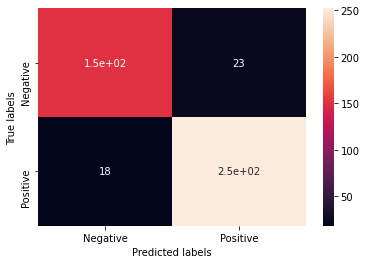

Preformance of train set:
Accuracy of SVM  model is: 90.77%
F1 score of SVM  model is: 90.26%
Loss of SVM  model is: 0.48
AUROC of SVM  model is: 0.96


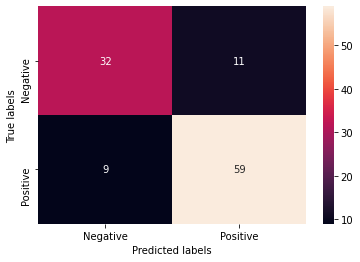

Preformance of test set:
Accuracy of SVM model is: 81.98%
F1 score of SVM model is: 80.85%
Loss of SVM  model is: 0.57
AUROC of SVM  model is: 0.91


In [15]:
#nonlinear model with dimensionality-reduced
svc = SVC(probability=True)
C = np.array([1, 100, 1000])
pipe=Pipeline(steps=[('scaler', StandardScaler()),('svm',svc)])
svm_nonlin=GridSearchCV(estimator=pipe,param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C,'svm__degree':[3],'svm__gamma':['auto','scale']},scoring=['accuracy','f1','precision','recall','roc_auc'],cv=skf,refit='roc_auc', verbose=3,return_train_score=True)
svm_nonlin.fit(X_train_pca,y_train)
best_svm_nonlin=svm_nonlin.best_estimator_
print('\n The best parmters are:')
print(svm_nonlin.best_params_)

y_pred_train_nonlinear= best_svm_nonlin.predict(X_train_pca)
y_pred_proba_train_nonlinear = best_svm_nonlin.predict_proba(X_train_pca)
J_train_nonlinear=hinge_loss(y_train,y_pred_train_nonlinear )

y_pred_test_nonlinear= best_svm_nonlin.predict(X_test_pca)
y_pred_proba_test_nonlinear = best_svm_nonlin.predict_proba(X_test_pca)
J_test_nonlinear=hinge_loss(y_test,y_pred_test_nonlinear )

#performance on train set
matrix_conf=metrics.confusion_matrix(y_train,y_pred_train_nonlinear)
sns.heatmap(matrix_conf, annot=True, xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive']).set(ylabel='True labels', xlabel='Predicted labels')
plt.grid(False)
plt.show()

print('Preformance of train set:')
print("Accuracy of SVM  model is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_nonlinear))) + "%")
print("F1 score of SVM  model is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_nonlinear, average='macro'))) + "%")
print("Loss of SVM  model is: " +str("{0:.2f}".format(J_train_nonlinear)))
print('AUROC of SVM  model is: {:.2f}'.format(roc_auc_score(y_train, y_pred_proba_train_nonlinear[:,1])))

#performance on test set
matrix_conf=metrics.confusion_matrix(y_test,y_pred_test_nonlinear)
sns.heatmap(matrix_conf, annot=True, xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive']).set(ylabel='True labels', xlabel='Predicted labels')
plt.grid(False)
plt.show()

print('Preformance of test set:')
print("Accuracy of SVM model is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_nonlinear))) + "%")
print("F1 score of SVM model is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_nonlinear, average='macro'))) + "%")
print("Loss of SVM  model is: " +str("{0:.2f}".format(J_test_nonlinear)))
print('AUROC of SVM  model is: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test_nonlinear[:,1])))

###### **7.d:** 
Train the same models on the best two features from section 6

Preformance of train set:


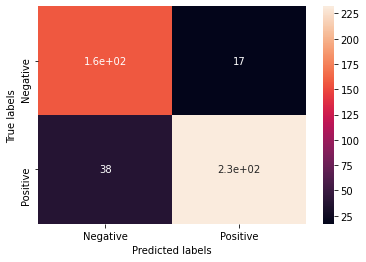

Accuracy of logistic regression model : 87.61%
F1 score of logistic regression model : 87.25%
Loss of logistic regression model : 0.37
AUROC of logistic regression model : 0.91

 Preformance of test set:


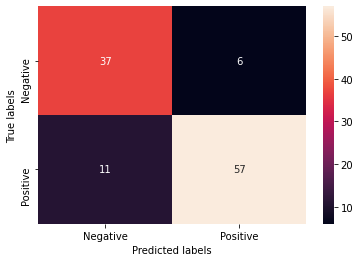

Accuracy of logistic regression model : 84.68%
F1 score of logistic regression model: 84.17%
Loss of logistic regression model : 0.37
AUROC of logistic regression model: 0.89


In [16]:
# Apply logistic regression on 2 features
X_train_2featuers=X_train[['Increased Thirst_Yes','Increased Urination_Yes']]
X_test_2featuers=X_test[['Increased Thirst_Yes','Increased Urination_Yes']]
log_reg = LogisticRegression(random_state=5, penalty='l1', C = 1, max_iter=1000,solver='liblinear')
log_reg.fit(X_train_2featuers, y_train)
y_pred_train=log_reg.predict(X_train_2featuers)
y_pred_proba_train = log_reg.predict_proba(X_train_2featuers)
J_train=log_loss(y_train,y_pred_proba_train )

y_pred_test = log_reg.predict(X_test_2featuers)
y_pred_proba_test = log_reg.predict_proba(X_test_2featuers)
J_test=log_loss(y_test,y_pred_proba_test)

#performance on train set
print('Preformance of train set:')
matrix_conf=metrics.confusion_matrix(y_train,y_pred_train)
sns.heatmap(matrix_conf, annot=True, xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive']).set(ylabel='True labels', xlabel='Predicted labels')
plt.grid(False)
plt.show()

print("Accuracy of logistic regression model : " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train))) + "%")
print("F1 score of logistic regression model : " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train, average='macro'))) + "%")
print("Loss of logistic regression model : " +str("{0:.2f}".format(J_test)))
print('AUROC of logistic regression model : {:.2f}'.format(roc_auc_score(y_train, y_pred_proba_train[:,1])))
#preformance on test set

print('\n Preformance of test set:')
matrix_conf=metrics.confusion_matrix(y_test,y_pred_test)
sns.heatmap(matrix_conf, annot=True, xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive']).set(ylabel='True labels', xlabel='Predicted labels')
plt.grid(False)
plt.show()

print("Accuracy of logistic regression model : " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test))) + "%")
print("F1 score of logistic regression model: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test, average='macro'))) + "%")
print("Loss of logistic regression model : " +str("{0:.2f}".format(J_test)))
print('AUROC of logistic regression model: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.885, test=0.843), f1=(train=0.902, test=0.860), precision=(train=0.931, test=0.935), recall=(train=0.875, test=0.796), roc_auc=(train=0.919, test=0.875), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.868, test=0.910), f1=(train=0.886, test=0.926), precision=(train=0.933, test=0.926), recall=(train=0.843, test=0.926), roc_auc=(train=0.846, test=0.874), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.870, test=0.899), f1=(train=0.889, test=0.913), precision=(train=0.925, test=0.959), recall=(train=0.856, test=0.870), roc_auc=(train=0.905, test=0.927), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.879, test=0.865), f1=(train=0.897, test=0.880), precision=(train=0.926, test=0.957), recall=(train=0.870, test=0.815), roc_auc=(train=0.912, test=0.899), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.879, test=0.864), f1=(train=0.895, test=0.889), precision=(train=0.944, test=0.889), recall=(train=0.852, test=0.889), roc_auc=(train=0.862, test=0.812), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=poly ......
[CV]  svm__C=1, svm__degree=3, svm

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.8s finished


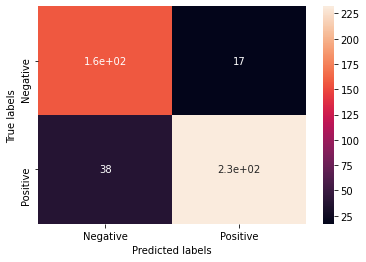

Preformance of train set:
Accuracy of SVM  model is: 87.61%
F1 score of SVM  model is: 87.25%
Loss of SVM  model is: 0.52
AUROC of SVM  model is: 0.91


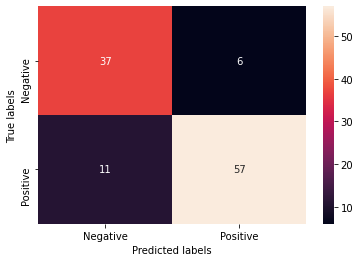

Preformance of test set:
Accuracy of SVM model is: 84.68%
F1 score of SVM model is: 84.17%
Loss of SVM  model is: 0.54
AUROC of SVM  model is: 0.89


In [17]:
#Apply nonlinear model on 2 features
svc = SVC(probability=True)
C = np.array([1, 100, 1000])
pipe=Pipeline(steps=[('scaler', StandardScaler()),('svm',svc)])
svm_nonlin=GridSearchCV(estimator=pipe,param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C,'svm__degree':[3],'svm__gamma':['auto','scale']},scoring=['accuracy','f1','precision','recall','roc_auc'],cv=skf,refit='roc_auc', verbose=3,return_train_score=True)
svm_nonlin.fit(X_train_2featuers,y_train)
best_svm_nonlin=svm_nonlin.best_estimator_
print('\n The best parmters are:')
print(svm_nonlin.best_params_)

y_pred_train_nonlinear= best_svm_nonlin.predict(X_train_2featuers)
y_pred_proba_train_nonlinear = best_svm_nonlin.predict_proba(X_train_2featuers)
J_train_nonlinear=hinge_loss(y_train,y_pred_train_nonlinear )

y_pred_test_nonlinear= best_svm_nonlin.predict(X_test_2featuers)
y_pred_proba_test_nonlinear = best_svm_nonlin.predict_proba(X_test_2featuers)
J_test_nonlinear=hinge_loss(y_test,y_pred_test_nonlinear )

#performance on train set
matrix_conf=metrics.confusion_matrix(y_train,y_pred_train_nonlinear)
sns.heatmap(matrix_conf, annot=True, xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive']).set(ylabel='True labels', xlabel='Predicted labels')
plt.grid(False)
plt.show()

print('Preformance of train set:')
print("Accuracy of SVM  model is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_pred_train_nonlinear))) + "%")
print("F1 score of SVM  model is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_pred_train_nonlinear, average='macro'))) + "%")
print("Loss of SVM  model is: " +str("{0:.2f}".format(J_train_nonlinear)))
print('AUROC of SVM  model is: {:.2f}'.format(roc_auc_score(y_train, y_pred_proba_train_nonlinear[:,1])))

#performance on test set
matrix_conf=metrics.confusion_matrix(y_test,y_pred_test_nonlinear)
sns.heatmap(matrix_conf, annot=True, xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive']).set(ylabel='True labels', xlabel='Predicted labels')
plt.grid(False)
plt.show()

print('Preformance of test set:')
print("Accuracy of SVM model is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_test_nonlinear))) + "%")
print("F1 score of SVM model is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_test_nonlinear, average='macro'))) + "%")
print("Loss of SVM  model is: " +str("{0:.2f}".format(J_test_nonlinear)))
print('AUROC of SVM  model is: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test_nonlinear[:,1])))

**Answer 7.e:**
In the models with Feature Selection (2 important features) F1 is higher, i.e. it can be concluded that the sensitivity has improved, more sick patients are classified as sick. And by reduced dimensionality  the AUROC has improved which means the models make better decisions. Higher the AUC, better the model is distinguish between patients with disease and no disease.
In general, there was no significant difference in the performance of the two methods and the choice of the appropriate method depended on the data. For example, data with many features that are not relevant to the classification, we would prefer to make a selection of features in order to remove the irrelevant features. While in data that most of the features are relevant to the classification and the number of features is high, we will apply the reduction of dimensions. 
We can also combine the methods and check if the performance has improved.


#### **Note:**
During the homework we apply standard scaler on AGE feature and also on the other features that are binary.
We saw that there is no need for scaling for all the features, and even if we do scaling only on feature AGE we will get the same results, as we expected.
